# Python Project

    By: Samrudh Keshava Kumar
    M#: M12420395

## Introduction:

The Boston dataset is a collection of 506 houses in Boston and 14 features of the house.
The aim of this project is to understand the data by perform an exploratory data analysis. We also identify correlations and outliers in the dataset and try to find the best model that fits the data for out-of-sample data as obtained from a 80-20 split. The model built here is a linear regression model.

## Exploratory data analysis

The dataset is contained in datasets within sklearn library. The data loaded from the package contains the data description, the raw data, the column names and target data which is `Medv`. 
The 13 explanatory variables and the target variables are to be merged to perform exploratory analysis, the `Pandas` package is used for data wrangling. 

In [81]:
from sklearn import datasets ## imports datasets which contains sample datasets
data = datasets.load_boston() ## load Boston housing data 


### Data Description

In [82]:
print(data.DESCR) ##print out the description of the data

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [83]:
%matplotlib inline 
##command which tells matplotlib to display the plots within the notebook
##import the library matplotlib and seaborn for statistical plots
import matplotlib.pyplot as plt
import seaborn as sb

**Load the dataset & format**

In [84]:
import numpy as np
import pandas as pd

In [85]:
##load the Boston dataset from a file
column_name = data.keys
print(column_name)
try:
    boston_full = pd.read_csv('boston.csv')
except FileNotFoundError:
    print("You are trying to read a file not in the directory")

<built-in method keys of Bunch object at 0x0000014CBC258DB0>


**Summary Statistics of the variables**

In [86]:
##Summary statistics 
boston_full.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


**Counting no of missing values**

In [87]:
##Gather column names from the dataset
columns = boston_full.columns

##function to calculate the number of missing values in each column
def densplots(dataset, x):
    try: 
        return print(dataset[[x]].isnull().sum())
    except KeyError:
        print('Check column name! it is not in the dataset')
    except TypeError:
        print('Check the datatype passed')    
##Print out the column name and missing values

for i in columns:
    densplots(boston_full, i)


CRIM    0
dtype: int64
ZN    0
dtype: int64
INDUS    0
dtype: int64
CHAS    0
dtype: int64
NOX    0
dtype: int64
RM    0
dtype: int64
AGE    0
dtype: int64
DIS    0
dtype: int64
RAD    0
dtype: int64
TAX    0
dtype: int64
PT    0
dtype: int64
B    0
dtype: int64
LSTAT    0
dtype: int64
MEDV    0
dtype: int64


No missing values were found in the dataset

**Ploting the pairwise relationship in the data**

The plot shows the pairwise relationship of the variables in the dataset. The function draws a univariate distribution of each variable across the diagonal axis. 
* __Note__: Double click on the image to zoom

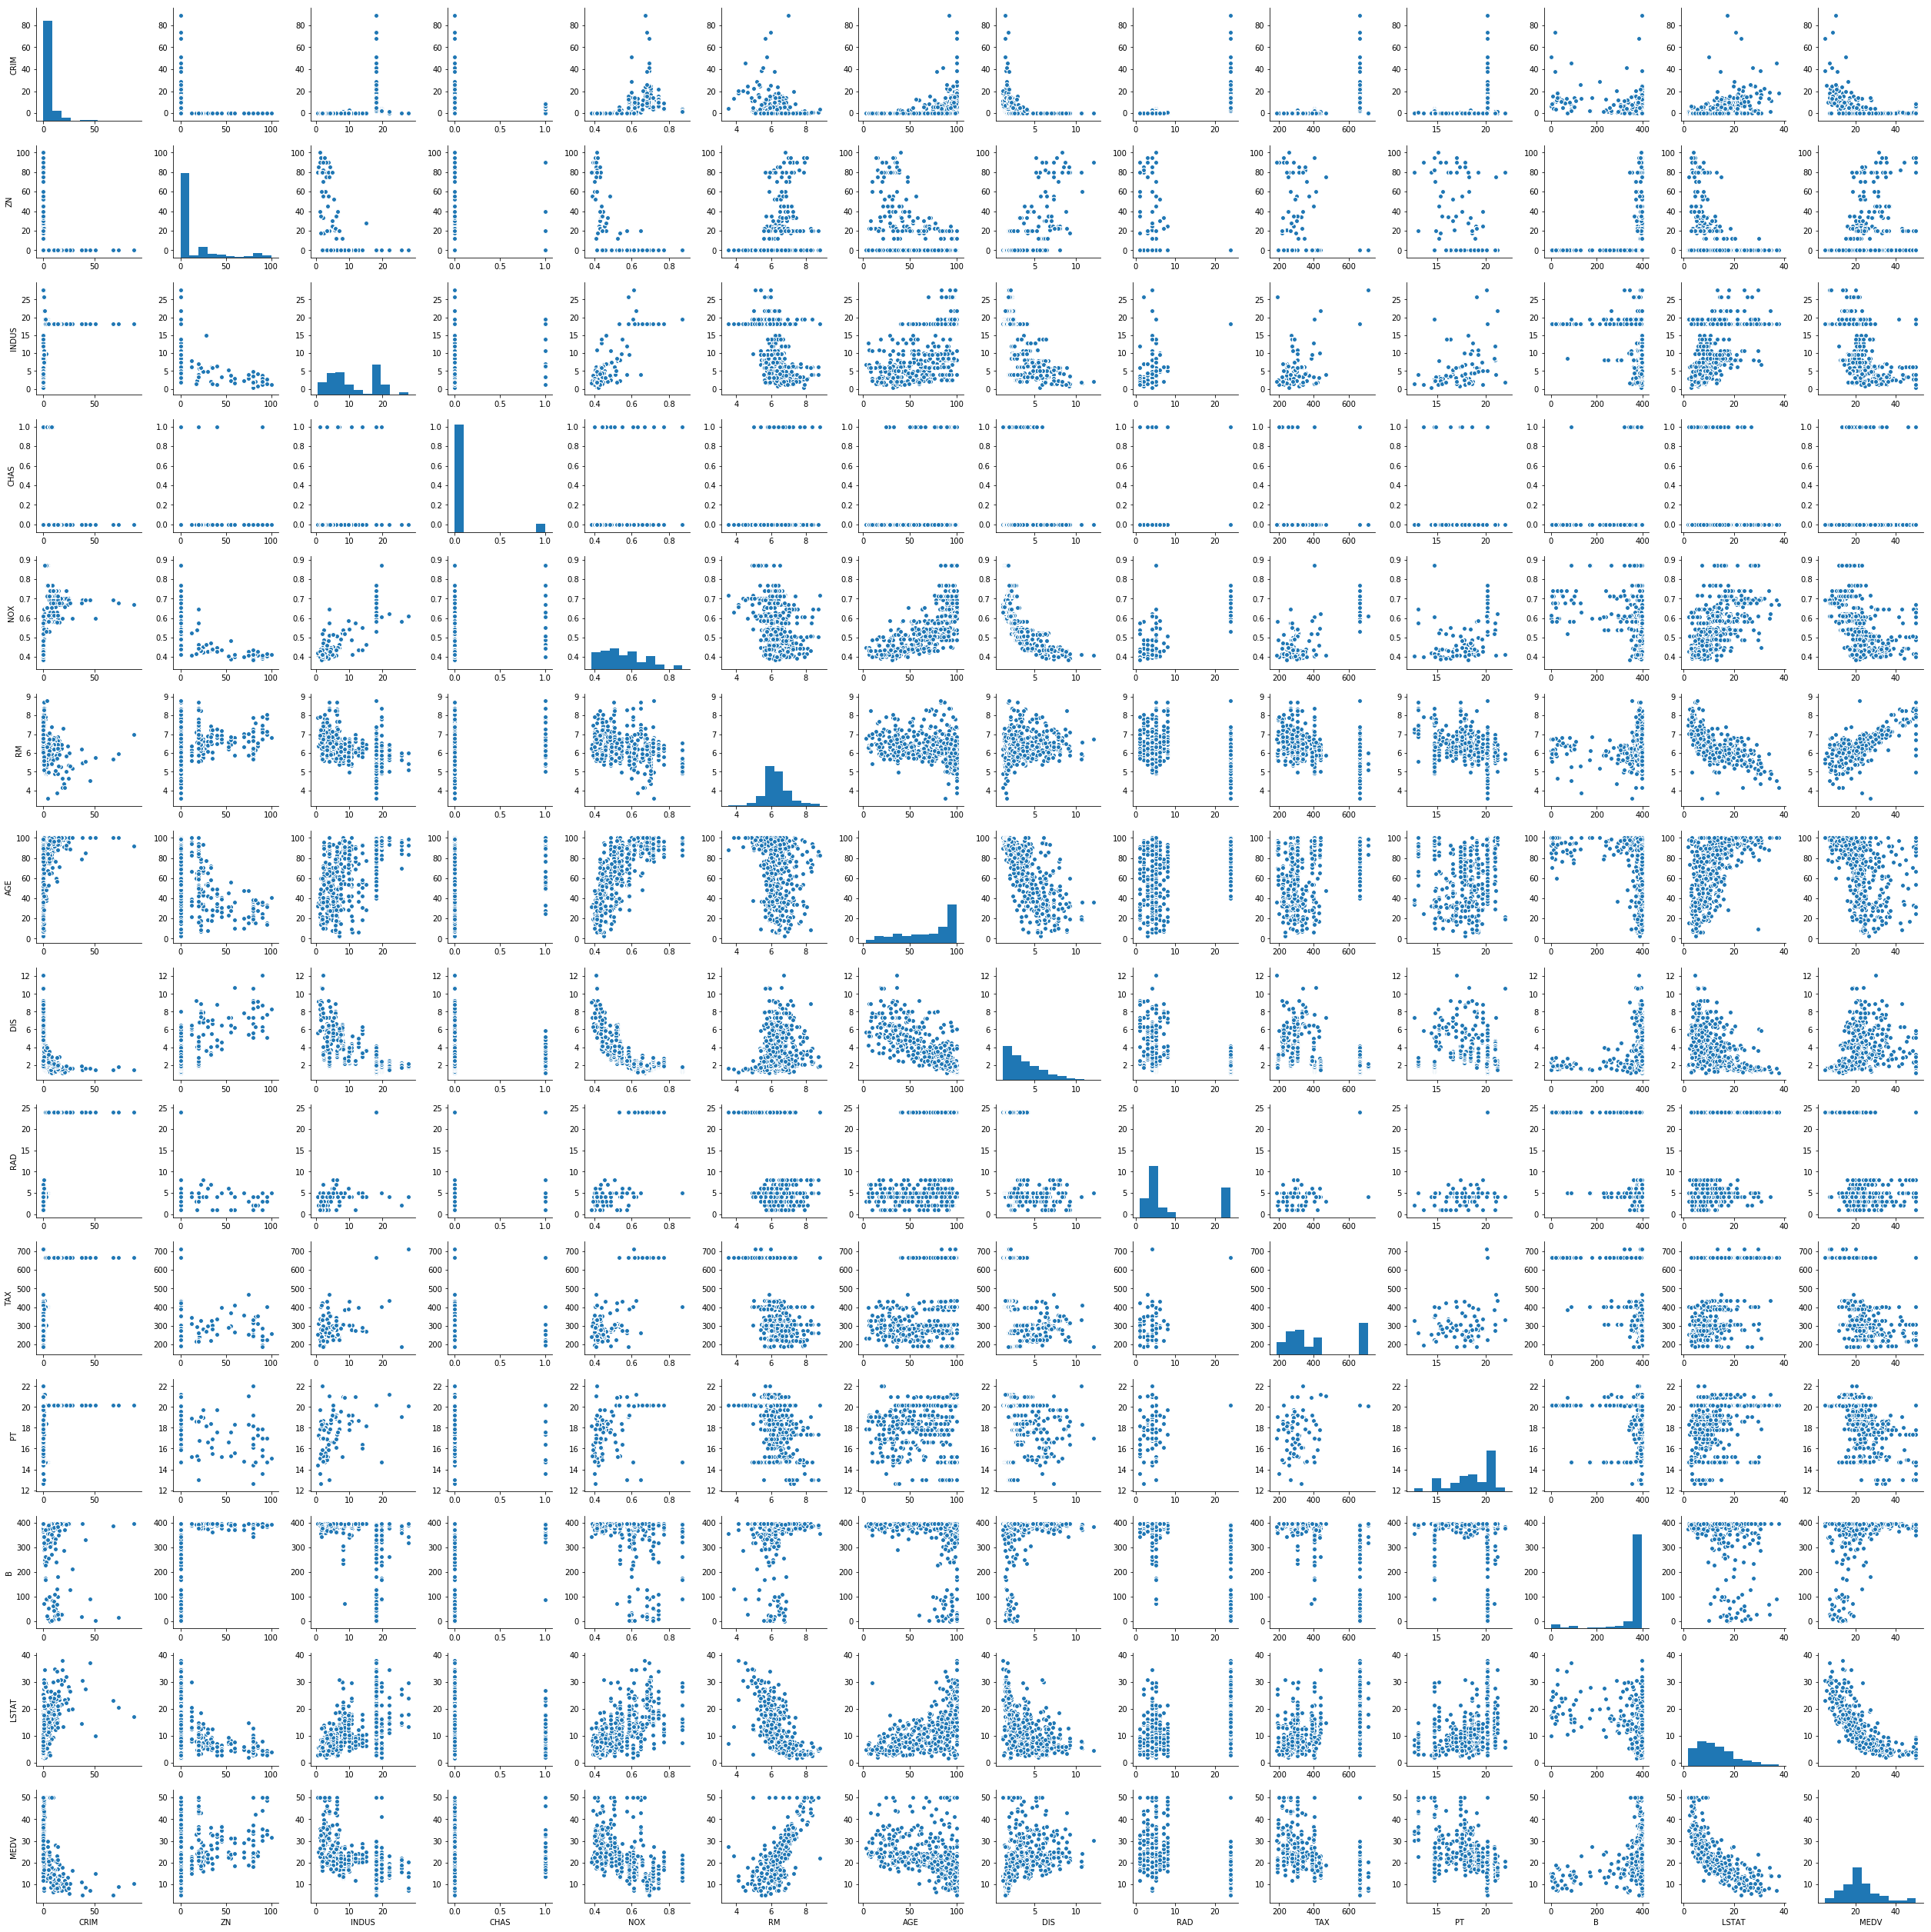

In [88]:
sb.pairplot(boston_full)

We notice few variables are correlated to each other. Variable `nox` is positively correlated with `indus` and `age`. `Tax` seems to high positive correlation with `indus`. On the other hand, `dis` is negatively correlated with `indus`, `nox` and `age`. The target variable `medv` has a high negative correlation with `lstat`.

**Insights:**
* To predict `medv`, `lstat` seems to be a good indicator, greater the porportion of low income people in the neighbourhood lower the median value, the relation seems to be slightly nonlinear
* The number of rooms `rm` show a positive linear realtion to `medv`
* Higher the `NOX` in the air lower the `medv` of the neighborhood

**Boxplots**

Boxplots allow us to visualize the median, quartiles and outliers if they are present in the column

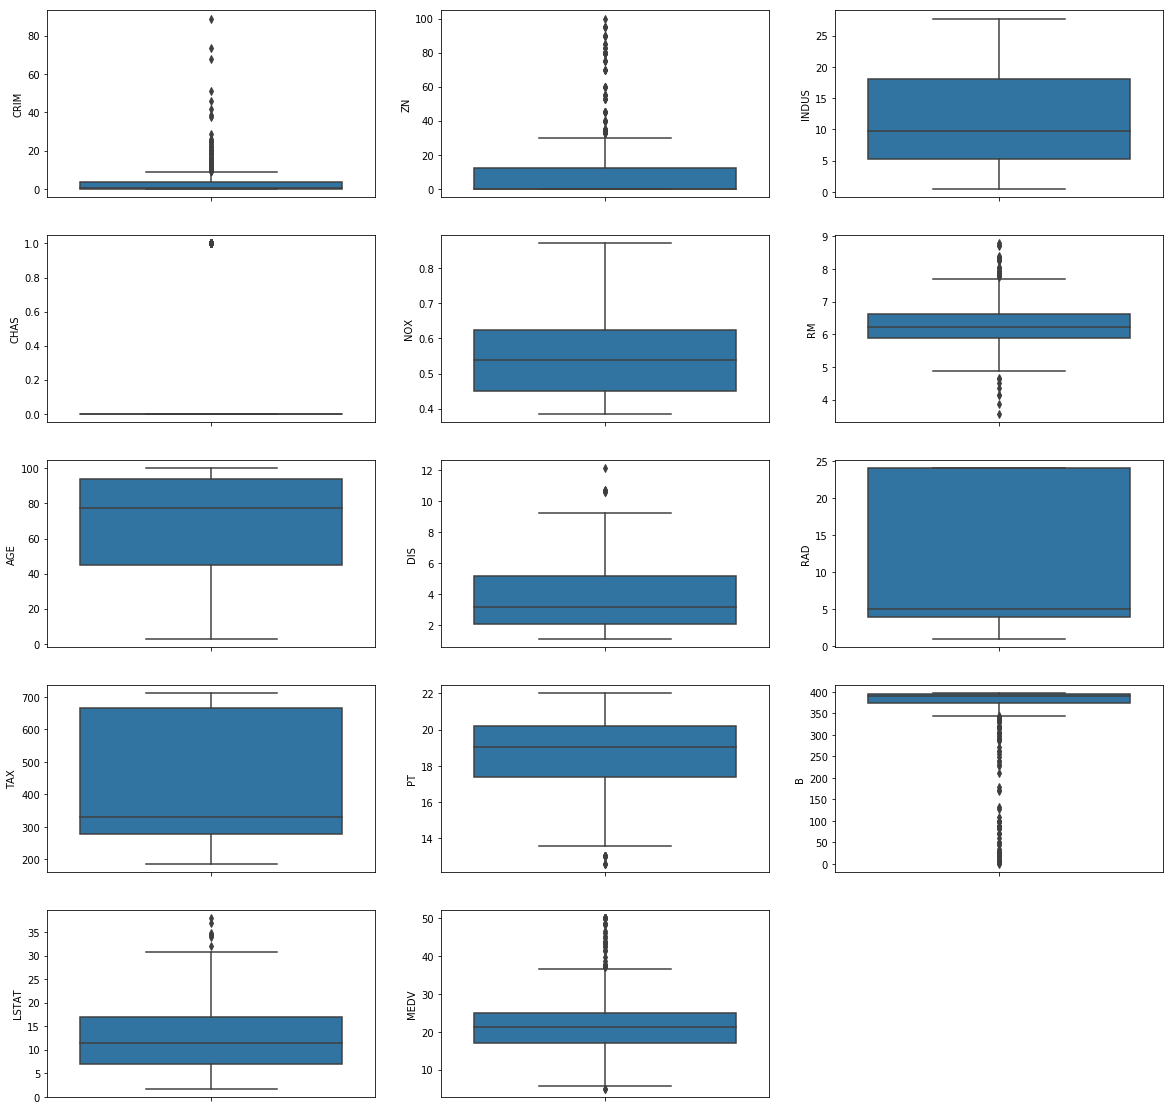

In [89]:
plt.figure(figsize=(20, 20))

for column_indx, column in enumerate(boston_full.columns):
    plt.subplot(5, 3, column_indx+1)
    sb.boxplot(y = column, data = boston_full)


* `CRIM` has a short IQR and contains a lot of outliers, similarly `B` and `ZN`

### Joint Distributions

Visualizing the joint ditributions of predictor and predicted variables having either linear or non-linear relationship with each other. We visualize `RM`, `LSTAT` and `DIS` vs. `MEDV`. 

**RM vs MEDV**

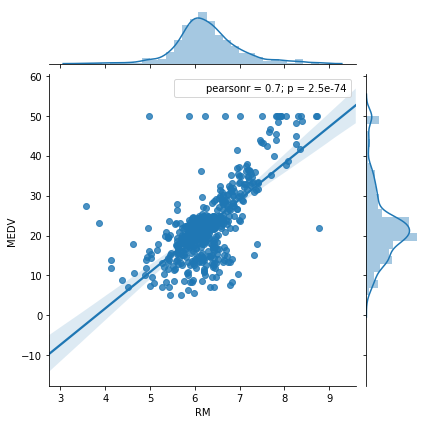

In [90]:
sb.jointplot("RM", "MEDV", data=boston_full, kind='reg')

**LSTAT vs MEDV**

`LSTAT` has a slightly non-linear negative relationship with `MEDV`.

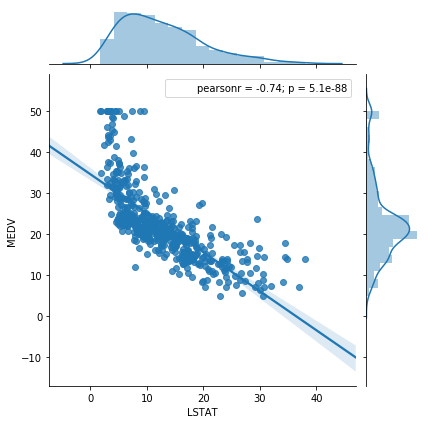

In [91]:
sb.jointplot("LSTAT", "MEDV", data=boston_full, kind='reg')

**DIS vs MEDV**

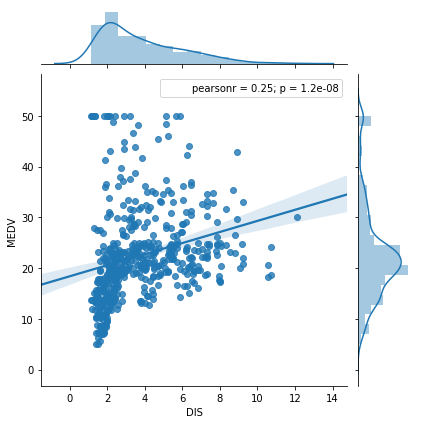

In [92]:
sb.jointplot("DIS", "MEDV", data=boston_full, kind='reg')

### Fitting a linear regression model 

In [93]:
# Split the data into training/testing sets

boston_x_train = boston_full.loc[:399,'CRIM':'LSTAT']
boston_x_test = boston_full.loc[399:,'CRIM':'LSTAT']

# Split the targets into training/testing sets

boston_y_train = boston_full.loc[:399, 'MEDV']
boston_y_test = boston_full.loc[399:, 'MEDV']

##run the model on all the variables in the dataset using the statsmodels.api which give a neatly formatted table

import statsmodels.api as sm
##run the OLS model and fit the data 
model = sm.OLS(boston_y_train, boston_x_train).fit()
predictions = model.predict(boston_x_test) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     824.3
Date:                Fri, 13 Apr 2018   Prob (F-statistic):          9.98e-273
Time:                        19:44:48   Log-Likelihood:                -1199.5
No. Observations:                 400   AIC:                             2425.
Df Residuals:                     387   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.2078      0.055     -3.755      0.000      -0.317      -0.099
ZN             0.0455      0.014      3.139      0.002       0.017       0.074
INDUS          0.0381      0.067      0.567      0.571      -0.094       0.170
CHAS           1.7367      0.915      1.899      0.058      -0.062       3.535
NOX           -2.4832      3.780     -0.657      0.512      -9.916       4.949
RM             6.2975      0.389     16.186      0.000       5.533       7.062
AGE           -0.0040      0.015     -0.271      0.786      -0.033       0.025
DIS           -0.9447      0.203     -4.649      0.000      -1.344      -0.545
RAD            0.3770      0.086      4.360      0.000       0.207       0.547
TAX           -0.0127      0.005     -2.803      0.005      -0.022      -0.004
PT            -0.4510      0.120     -3.750      0.000      -0.687      -0.215
B              0.0111      0.006      1.815      0.070      -0.001       0.023
LSTAT         -0.4476      0.059     -7.576      0.000      -0.564      -0.331
==============================================================================
Omnibus:                      135.577   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              993.298
Skew:                           1.236   Prob(JB):                    2.03e-216
Kurtosis:                      10.313   Cond. No.                     8.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OLS regression summary shown above, shows that `AGE`, `NOX`, `INDUS` and `B` are not significant which is indicated by the P-value (P>|t|) greater than 0.05. The model will be retrained using the variables other than the onces given above. 

In [94]:

model2 = sm.OLS(boston_y_train, boston_x_train.drop(['AGE', 'NOX', 'INDUS', 'B' ], axis =1)).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1190.
Date:                Fri, 13 Apr 2018   Prob (F-statistic):          6.32e-278
Time:                        19:44:48   Log-Likelihood:                -1201.5
No. Observations:                 400   AIC:                             2421.
Df Residuals:                     391   BIC:                             2457.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.2059      0.055     -3.759      0.000      -0.314      -0.098
ZN             0.0469      0.014      3.299      0.001       0.019       0.075
CHAS           1.7046      0.904      1.885      0.060      -0.073       3.482
RM             6.5011      0.245     26.576      0.000       6.020       6.982
DIS           -0.8658      0.172     -5.044      0.000      -1.203      -0.528
RAD            0.3799      0.083      4.558      0.000       0.216       0.544
TAX           -0.0134      0.004     -3.446      0.001      -0.021      -0.006
PT            -0.3625      0.110     -3.291      0.001      -0.579      -0.146
LSTAT         -0.4468      0.047     -9.481      0.000      -0.539      -0.354
==============================================================================
Omnibus:                      132.693   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1008.326
Skew:                           1.191   Prob(JB):                    1.11e-219
Kurtosis:                      10.404   Cond. No.                     1.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
boston_x_test['pred'] = model2.predict(boston_x_test.drop(['AGE', 'NOX', 'INDUS', 'B' ], axis =1))


In [96]:
boston_x_test['MSE'] = ((boston_x_test.pred - boston_y_test)**2)
print("The MSE of the model on the test data is:",boston_x_test.MSE.mean())

The MSE of the model on the test data is: 46.831350360338114


### Conclusion

The EDA was performed on the dataset to get a feels for the data. The distribution plots and the boxplots give an understanding of the range of values and the kind of distributions it has to check if applying linear regression is valid. 

From the scatter plot we observed that `AGE`, `NOX`, `INDUS` and `B` do not show a observable relationship to the predictor variable `MEDV`, this is also observed in the linear model that was built. 

The final regression model gives an MSE of 47.194 and adjusted R-sqr of 0.964.